In [95]:
import os
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

# Feature Selection for Clustering of Telegram Chats 

## Load the data
Lorem Ipsum Dolor 

In [74]:
path = os.path.join(os.getcwd(), '../data/csv/freiesth_scrape_1.csv')
df = pd.read_csv(path, low_memory=False)
df.head()

,Unnamed: 0,chat_handle,chat_name,collection_time,fwd_from_chat_handle,fwd_from_user_name,is_fwd,is_group_elem,is_reply,message_date,...,sender_first_name,sender_last_name,sender_username,telegram_chat_id,telegram_message_id,telegram_sender_id,webpage_author,webpage_description,webpage_title,webpage_url
0,0,NaN,Qfs Die weißen Hüte Chat,2024-07-14 08:21:36,QFSQwantum,NaN,True,False,False,2024-07-14 06:56:44,...,NaN,NaN,QFSQwantum,1584825795,276635,1504007138,NaN,NaN,NaN,NaN
1,1,rus_now_news,Россия сейчас,2024-07-14 08:25:37,NaN,NaN,False,False,False,2024-07-13 20:59:02,...,NaN,NaN,rus_now_news,1419822622,76375,1419822622,NaN,NaN,NaN,https://hooks.pro/media/2024/07/13/bot14465618...
2,2,nwsru,NEWS.ru | Новости,2024-07-14 01:16:15,NaN,NaN,False,False,False,2024-07-13 20:31:56,...,NaN,NaN,nwsru,1436354653,81671,1436354653,NaN,NaN,NaN,NaN
3,3,NaN,Corona - eine Laborpandemie Chat,2024-07-13 12:33:10,auf1tv,NaN,True,False,False,2024-07-13 11:47:41,...,NaN,NaN,laborpandemie,1588507929,8814,1463054743,NaN,NaN,NaN,NaN
4,4,ktf_keystofreedom,KEYS TO FREEDOM,2024-07-14 08:45:44,keystofreedom,NaN,True,False,False,2024-07-13 11:19:05,...,NaN,NaN,keystofreedom,1975033259,41083,1685639089,NaN,NaN,NaN,NaN


## Preprocessing

### Check Message Counts per Group

Let's take a look at how many messages were collected for each of the chats in our dataset. 

To do so, we start off with binning the counts per chat in steps of thousands and take a more granular look, should the need arise. The y-axis is set to a **logarithmic scale** to account for the wide range of message counts across chats. This approach helps in visualizing the distribution more effectively, especially when there are a few chats with very few message counts compared to the majority -- which is to be expected due to a quirk of the data collection process. 

<Axes: title={'center': 'Test'}, ylabel='count'>

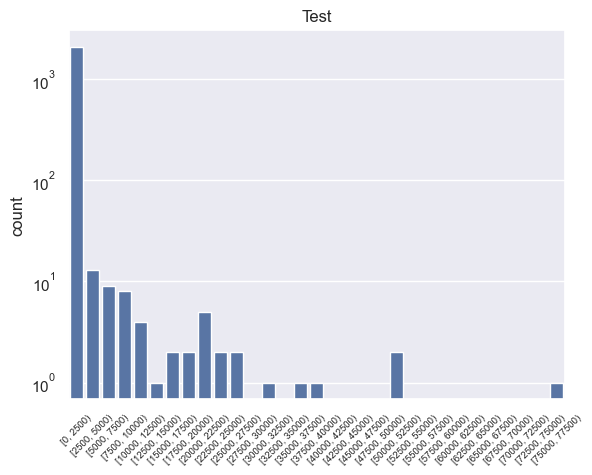

In [97]:
chats_message_counts = df.groupby("chat_name").size()

# bin the counts in steps of 1000
bin_edges = range(0, chats_message_counts.max() + 2500, 2500)
binned_counts = pd.cut(chats_message_counts, bins=bin_edges, right=False)
binned_counts_summary = binned_counts.value_counts().sort_index()

plt.yscale('log')
plt.xticks(rotation=45)
plt.xticks(fontsize=7)
plt.title("Test")
sns.barplot(binned_counts_summary)

In [ ]:
chats_message_counts < 

As expected, a majority of chats contains fewer than 2500 chats. Let's remove

In [93]:
chats_message_counts = df.groupby("chat_name").size()
over_1000 = chats_message_counts[chats_message_counts > 1000]
#list(over_1000.index)

In [51]:
df.shape

(813392, 31)